# "A data-driven biology-based network model reproduces C. elegans premotor neural dynamics" figure bookmarks


## Compare weights to weights in Leifer paper

### [Results -> Analysis -> Signal propagation maps -> Figure 7](#Figure-7)


In [1]:
using DataFrames
using CSV
using Plots
using Colors
using Statistics

using DifferentialEquations

using JSON

using SavitzkyGolay

using DataInterpolations

using LinearAlgebra

In [2]:

curdir = pwd()
dir_one_up = abspath(joinpath(curdir, ".."))

"/Users/mmtre/Library/CloudStorage/OneDrive-IllinoisInstituteofTechnology/Github repos/Celegans_premotor/"

In [3]:
##########################
### set font defaults ####
##########################
plot_font = "Computer Modern"

default(
    fontfamily=plot_font,
    titlefontsize = 11,
    labelfontsize = 9,
    linewidth=2, 
    framestyle=:nothing, 
    label=nothing, 
    grid=true
)

In [4]:
color_array = ["43c7c0","6ed0ca","99d8d4","c4e0de","efe8e7","f3b8b6","f68785","f95754","fc2622"]

# Convert hexadecimal colors to RGB colors
rgb_colors = [parse(RGB, "#" * color) for color in color_array]

In [5]:
data_folder = "data/Leifer_data"
filename = "fig2_data.csv"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);

df = DataFrame(CSV.File(filepath));

In [6]:
df
names_dict=Dict(zip(names(df)[2:end], collect(1:length(names(df)[2:end]))));

In [7]:
intrinsic_neurons = ["AVBL", "AVBR", "RIBL", "RIBR", "RID", "AVDL", "AVDR", "AVAL", "AVAR", "RIML", "RIMR", "AVEL", "AVER", "AIBL", "AIBR"]


intrinsic_neurons_idx = []
for nm in intrinsic_neurons
    names_dict[nm]
    append!(intrinsic_neurons_idx, names_dict[nm])
end

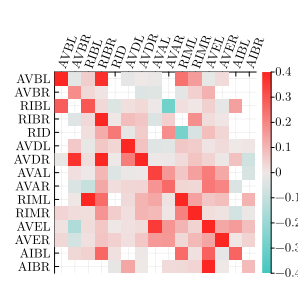

In [8]:

core_mat = df[intrinsic_neurons_idx, intrinsic_neurons_idx.+1]  # the index is 1 off for the columns
core_mat = Matrix(core_mat)

ismissing(core_mat[2,1])

for i in 1:size(core_mat,1)
    for j in 1:size(core_mat,2)
        if ismissing(core_mat[i,j])
            core_mat[i,j] = NaN
        end
    end
end


p1 = plot(heatmap(intrinsic_neurons,intrinsic_neurons,core_mat, 
c = rgb_colors,  #rgb_colors
aspect_ratio=:equal,
            yflip = true,
            xrotation = 70,
            xmirror = true, clim = (-0.4,0.4)), size = (298,300))

display(p1)
#savefig(p1,"figures/new_figs/Leifer_weights.pdf") # behav ts plot

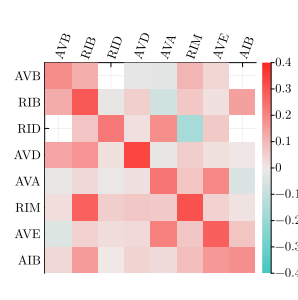

In [9]:
core_neurons_combo = ["AVB", "RIB", "RID", "AVD", "AVA", "RIM", "AVE", "AIB"]
num_combo = length(core_neurons_combo)

core_mat_combo = zeros(num_combo, num_combo).*NaN

# AVB and RIB
for i in collect(0:1)
    for j in collect(0:1)

        mn = mean(filter(!isnan, core_mat[2*i+1:2*i+2, 2*j+1:2*j+2]))
        core_mat_combo[i+1,j+1] = mn
    end
end

# RID
core_mat_combo[3,3] = core_mat[5,5]
core_mat_combo[3,1] = mean(filter(!isnan, core_mat[5,1:2]))
core_mat_combo[3,2] = mean(filter(!isnan, core_mat[5,3:4]))

core_mat_combo[1,3] = mean(filter(!isnan, core_mat[1:2,5]))
core_mat_combo[2,3] = mean(filter(!isnan, core_mat[3:4,5]))

#i = 5
for j in collect(3:num_combo-1)

    mn=mean(filter(!isnan, core_mat[5,2*j:2*j+1]))
    core_mat_combo[3,j+1] = mn

end

#j = 5

for i in collect(3:num_combo-1)
    mn = mean(filter(!isnan, core_mat[2*i:2*i+1,5]))
    core_mat_combo[i+1,3] = mn
end


#non RID 

# AVB and RIB to revs
for i in collect(0:1)
    for j in collect(3:num_combo-1)

        mn = mean(filter(!isnan, core_mat[2*i+1:2*i+2, 2*j:2*j+1]))
        core_mat_combo[i+1,j+1] = mn
    end
end


# revs to AVB and RIB
for i in collect(3:num_combo-1)
    for j in collect(0:1)

        mn = mean(filter(!isnan, core_mat[2*i:2*i+1, 2*j+1:2*j+2]))
        core_mat_combo[i+1,j+1] = mn
    end
end



# revs to revs
for i in collect(3:num_combo-1)
    for j in collect(3:num_combo-1)

        mn  = mean(filter(!isnan, core_mat[2*i:2*i+1, 2*j:2*j+1]))

        core_mat_combo[i+1, j+1] = mn
    end
end



###########################
#### make combo figure ####
###########################

p1 = plot(heatmap(core_neurons_combo,core_neurons_combo,core_mat_combo, 
c = rgb_colors,  #rgb_colors
aspect_ratio=:equal,
            yflip = true,
            xrotation = 70,
            xmirror = true, clim = (-0.4,0.4)), size = (298,300))

display(p1)
#savefig(p1,"figures/new_figs/Leifer_weights_combo.pdf") # behav ts plot

## Now load my simulation and do "optogenetic stimulation"

In [10]:
#################################
#### load saved functions  ######
#################################

filename = "functions_regression.jl"
data_folder = "functions"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);
include(filepath)

#include("functions/functions_regression.jl")
######### contains functions .. #########
## RELU
## Data_Replacement

filename = "functions_simulation.jl"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);
include(filepath)

#include("functions/functions_simulation.jl")
######### contains functions .. #########
## lorenz!
## moving_average
## heaviside_pulse

heaviside_pulse (generic function with 1 method)

### load processed White graph data

In [11]:
using DataFrames
using CSV

data_folder = "data/White_data_processed"
filename = "df5.csv"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);
df5 = DataFrame(CSV.File(filepath));

############################################
### take processed data from White #########
############################################

out_set = collect(Set(df5[!, :"Neuron2"]))
in_set = collect(Set(df5[!, :"Neuron1"]))
final_neurons = union(out_set, in_set)
N = size(final_neurons)[1]  ## number of neurons in my model
final_neuron_dict = Dict(zip(final_neurons, collect(1:N)))

#############################
### make EJ matrix ##########
#############################
df_EJ = filter(row -> row."Type" == "EJ",df5) # df_subset
EJ_mat = zeros(N,N)
for i in collect(1:size(df_EJ,1))
    w_tmp = df_EJ[i,:]["Nbr"]
    neuro1 = df_EJ[i,:]["Neuron1"]
    neuro2 = df_EJ[i,:]["Neuron2"]
    id1 = final_neuron_dict[neuro1]
    id2 = final_neuron_dict[neuro2]
    EJ_mat[id1, id2] = w_tmp
end

#############################
### make Syn matrix #########
#############################
df_S = filter(row -> row."Type" == "S",df5) # df_subset
S_mat = zeros(N,N)

for i in collect(1:size(df_S,1))
    w_tmp = df_S[i,:]["Nbr"]
    neuro1 = df_S[i,:]["Neuron1"]
    neuro2 = df_S[i,:]["Neuron2"]
    id1 = final_neuron_dict[neuro1]
    id2 = final_neuron_dict[neuro2]
    S_mat[id1, id2] = w_tmp
end

S_mat = S_mat'; # transpose for matrix multiplication
S_mat_bool = S_mat .!=0;

### Simulate core neurons using avg regression weights

In [12]:
using JLD2

data_folder = "data/model_weights"
filename = "avg_model_weights.jld2"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);


#@save filepath A_10takes_avg d_10takes_avg
@load filepath A_10takes_avg d_10takes_avg


2-element Vector{Symbol}:
 :A_10takes_avg
 :d_10takes_avg

In [13]:
###########################
###### ODE function #######
###########################
function lorenz!(du,u,p,t)
    γ, β, τ = p
    #### get the current signal ####
    usig_tmp = []
    for j in collect(1:Nsignals)
        append!(usig_tmp,Dsigs_interp[j](t))
    end
    
    #### put both the intrinsic and signal into single vector ####
    utmp = zeros(Ncore)
    utmp[ids_intrinsic] = u  #put in current intrinsic timepoints
    utmp[ids_signal] = usig_tmp
    du_tmp = zeros(Ncore)
    ublockT = transpose(repeat(utmp, 1, Ncore))
    ublock = repeat(utmp, 1, Ncore)
    #A_u = A*u
    
    #A_RELUu = A*Relu.(utmp) # use instead of A_u

    ###############################
    ### Cut all synaptic input  ###
    ###############################
    A_RELUu = A_cutallsig*Relu.(utmp)

    
    #W_u = diag(W*(ublock - ublockT))
    W_u = diag(W*(ublock - ublockT))

    for j in collect(1:Ncore)
        ########### divide by global timescale variable tau ############
         du_tmp[j] = (1/τ)*(a*(utmp[j].-fp1).*(utmp[j].-fp2).*(utmp[j].-fp3) + d[j] + γ*A_RELUu[j] + β*W_u[j]) # fps version
    end
    
    du_tmp = du_tmp[ids_intrinsic]  # JUST output the derivative for the intrinsic neurons!
    for j in collect(1:Nintrinsic)
        du[j] = du_tmp[j] 

        if j ==1
          du[j] = du[j] + ts_pulse_interp1(t)
        elseif j ==2
            du[j] = du[j] + ts_pulse_interp2(t)
        elseif j ==3
            du[j] = du[j] + ts_pulse_interp3(t)
        elseif j ==4
            du[j] = du[j] + ts_pulse_interp4(t)
        elseif j ==5
            du[j] = du[j] + ts_pulse_interp5(t)
        elseif j ==6
            du[j] = du[j] + ts_pulse_interp6(t)
        elseif j ==7
            du[j] = du[j] + ts_pulse_interp7(t)
        elseif j ==8
            du[j] = du[j] + ts_pulse_interp8(t)
        elseif j ==9
            du[j] = du[j] + ts_pulse_interp9(t)
        elseif j ==10
            du[j] = du[j] + ts_pulse_interp10(t)
        elseif j ==11
            du[j] = du[j] + ts_pulse_interp11(t)
        elseif j ==12
            du[j] = du[j] + ts_pulse_interp12(t)
        elseif j ==13
            du[j] = du[j] + ts_pulse_interp13(t)
        elseif j ==14
            du[j] = du[j] + ts_pulse_interp14(t)
        elseif j ==15
            du[j] = du[j] + ts_pulse_interp15(t)
        end
    end
end




lorenz! (generic function with 1 method)

### Find highly correlated neurons

In [14]:
#include("make_switchout_list.jl")
######### contains .. #########
## computes list of "highly_correlated_neurons"
## makes "switchout_list"


##########################################
### find higherly correlated neurons,  ###
### use these neurons as candidate     ###
### replacements when neuron is missing ##
##########################################

data_folder = "data/Atanas_data"

fn1 = "2023-03-07-01.json"
fn2 = "2023-01-23-21.json"
fn3 = "2023-01-23-15.json"  # avb (use for test?)
fn4 = "2023-01-19-22.json"
fn5 = "2023-01-19-15.json" # avb
fn6 = "2023-01-19-08.json" # avb
fn7 = "2023-01-19-01.json" # avb
fn8 = "2023-01-17-14.json"
fn9 = "2023-01-17-07.json"
fn10 = "2023-01-16-22.json" #avb, heat
fn11 = "2023-01-16-15.json"
fn12 = "2023-01-16-08.json" #avb, heat
fn13 = "2023-01-10-14.json" #avb, heat  (use this for plot example!)
fn14= "2023-01-10-07.json"  #avb, heat
fn15 = "2023-01-09-28.json"
fn16 = "2023-01-09-22.json"
fn17 = "2023-01-09-15.json"
fn18 = "2023-01-09-08.json" #avb, heat
fn19 = "2023-01-06-15.json"
fn20 = "2023-01-06-08.json"
fn21 = "2023-01-06-01.json"
fn22 = "2023-01-05-18.json" #avb, heat
fn23 = "2023-01-05-01.json"
fn24 = "2022-12-21-06.json"
fn25 = "2022-08-02-01.json"
fn26 = "2022-07-20-01.json"
fn27 = "2022-06-28-07.json"
fn28= "2022-06-28-01.json"
fn29 = "2022-06-14-13.json"
fn30 = "2022-06-14-07.json"

all_filenames = [fn1, fn2, fn3, # skip fn3
     fn4, fn5, fn6, fn7, fn8, fn9, fn10,
                fn11, fn12, fn13,  
    fn14, fn15, fn16, fn17, fn18, fn19, fn20,
                fn21, fn22, fn23, fn24, fn25, fn26, fn27, fn28, fn29, fn30]

num_files = size(all_filenames)[1]

cor_store = zeros(N, num_files)
fname_counter = 1

for fname in all_filenames
    filepath1 = joinpath(joinpath(dir_one_up, data_folder), fname);
    Fdata1 = JSON.parsefile(filepath1)
    labs = Fdata1["labeled"]
    Fts1 = Fdata1["trace_array"]
    key_set = keys(labs)
    Dict_nms = Dict{String,Int}()
    for ky in key_set
        Dict_nms[labs[ky]["label"]] = parse(Int64, ky)       
    end
    names_have = keys(Dict_nms);
    
    i = 1 # counter
    for nm in final_neurons
        ## get two L/R ts to compare ##
        if nm in(names_have)
            ts_tmp1 = Fts1[Dict_nms[nm]]  
            ###### normal length 4 neurons #######
            if length(nm) == 4
                nm_new = [] # put new name in
                if string(nm[4]) == "L"
                    nm_new = string(nm[1:3])*string("R")
                elseif string(nm[4]) == "R"
                    nm_new = string(nm[1:3])*string("L")
                end
                if nm_new in(names_have)
                    #println(nm_new)
                    ts_tmp2 = Fts1[Dict_nms[nm_new]]
                    cor_tmp = cor(ts_tmp1, ts_tmp2) ## compute corelation between two timeseries
                    cor_store[i,fname_counter] = cor_tmp ## put correlation in storage
                end
            end
            ###### end length 4 neurons #######
            ###### length 5 neurons #######
            if length(nm) == 5
                nm_new = [] # put new name in
                if string(nm[5]) == "L"
                    nm_new = string(nm[1:4])*string("R")
                elseif string(nm[5]) == "R"
                    nm_new = string(nm[1:4])*string("L")
                end
                if nm_new in(names_have)
                    #println(nm_new)
                    ts_tmp2 = Fts1[Dict_nms[nm_new]]
                    cor_tmp = cor(ts_tmp1, ts_tmp2) ## compute corelation between two timeseries
                    cor_store[i,fname_counter] = cor_tmp ## put correlation in storage
                end
            end
            ###### end length 5 neurons #######
        end
        i+=1 
    end
    fname_counter+=1
end

cor_mean_list = zeros(N)
for i in collect(1:N)
    tmp_row = cor_store[i,:]
    if sum(tmp_row) !=0
        idx_tmp = findall(tmp_row.!=0)
        cor_vals_tmp = tmp_row[idx_tmp]
        cor_mean_list[i]=mean(cor_vals_tmp)
    end
end

###############################################
## final list of highly correlated neurons ####
###############################################
highly_correlated_neurons = final_neurons[findall(cor_mean_list.>0.7)]; # 75

##########################################################
## use this list and "AVB" pair to make substitutions ####
##########################################################

switchout_list = append!(["AVBL", "AVBR"], highly_correlated_neurons);


### Simulation set up data

In [15]:
################################
## dataset for input signals ###
#fn3 = "2023-01-23-15.json"  # avb; THIS IS THE VERY BEST DATASET TO SIMULATE, at least one of avb, rib, avd, ava, ave, rim, aib
                            # 102 out of 147 neurons labeled -> this is a lot of labels! also a "baseline" dataset - no heat

#### backup good dataset with at least one of all neurons: "2023-01-19-15", "2023-01-09-08", "2023-01-10-07"
#fn13 = "2023-01-10-07.json" # avb
#fn_extra = "2023-01-19-15.json" #bad

###############################################
## use all of these for PLOS comp bio  ########
###############################################
#fn = "2023-01-09-08.json"  # USE THIS for PLOS comp bio
#fn = "2023-01-10-07.json"  # USE THIS for PLOS comp bio
#fn = "2023-01-23-21.json" # USE THIS for PLOS comp bio
#fn = "2023-01-05-01.json"  # USE THIS for PLOS comp bio
#fn = "2023-01-09-15.json"  # USE THIS for PLOS comp bio - matching behav ts
#fn = "2023-01-09-22.json"   # USE THIS for PLOS comp bio

fn = "2023-01-23-15.json"
date_string =fn[1:13]
################################

data_folder = "data/Atanas_data"
filepath1 = joinpath(joinpath(dir_one_up, data_folder), fn); # make sure and change this!
Fdata1 = JSON.parsefile(filepath1)
labs = Fdata1["labeled"]
Fts1 = Fdata1["trace_array"]
dt = round(Fdata1["avg_timestep"]; digits = 3)
dFts1dt = copy(0*Fts1)

#########################
####  smooth data  ######
#########################
for i in collect(1:size(Fts1)[1])
    ts_tmp = savitzky_golay(Fts1[i], 11, 5).y;
    #ts_tmp = savitzky_golay(Fts1[i], 21, 7).y;
    ts_tmp_chop1 = ts_tmp[3:end]
    ts_tmp_chop2 = ts_tmp[1:end-2]
    dts_dt_tmp = (ts_tmp_chop1 - ts_tmp_chop2)/(2*dt)
    ts_tmp_mid = ts_tmp[2:end-1]
    Fts1[i] = ts_tmp_mid
    dFts1dt[i] = dts_dt_tmp
end
key_set = keys(labs)
Dict_nms = Dict{String,Int}()
for ky in key_set
    Dict_nms[labs[ky]["label"]] = parse(Int64, ky)       
end
names_have = keys(Dict_nms);
ts_len = size(Fts1[1])[1]

#########################################################################################################
### Go though list of model neurons, see what model neurons there are timeseries for and collect ts #####
#########################################################################################################
ts_myneuros = zeros(N,ts_len)
dtsdt_myneuros = zeros(N,ts_len)

##################
##################

i = 1 # counter
for nm in final_neurons
    if nm in(names_have)
        ts_myneuros[i,:] = Fts1[Dict_nms[nm]]  
        dtsdt_myneuros[i,:] = dFts1dt[Dict_nms[nm]]      
    ###############################
    ## ADD in DATA REPLACEMENT ##
    ##############################
    else
        #Data_Replacement(nm)
        Data_Replacement(i, nm, names_have, switchout_list, Dict_nms, ts_myneuros, dtsdt_myneuros, Fts1, dFts1dt)
    end
    i+=1 # move on to the next row
end


##########################
## Pre for regression ####
##########################
D = copy(ts_myneuros)  # timeseries of all neurons in order of "final_neurons" (many rows zero, no data for them)
dDdt = copy(dtsdt_myneuros)  # derivative timeseries

##########################
#### get short D matrix ##
##########################
row_sum = sum(D, dims = 2)
idxfull_list = Int64[]
for i in collect(1:size(row_sum)[1])
    if row_sum[i] != 0
        append!(idxfull_list, i)  # get index of nonzero rows (aka final_neurons that have a timeseries)
    end  
end

Dshort = D[idxfull_list,:] # only the rows with nonzero timeseries
dDdtshort = dDdt[idxfull_list,:]  # only the rows with nonzero timeseries

println("num neurons ts = ", size(idxfull_list)[1]) # number of final_neurons that have a timeseries

##################################################
## get submatrices with only core (ts) neurons ###
##################################################
EJ_mat_short = EJ_mat[idxfull_list,idxfull_list]
S_mat_short = S_mat[idxfull_list,idxfull_list]
N_short = size(idxfull_list)[1]

#########################################################
## core neurons - named and timeseries - short block ####
#########################################################
core_neurons = final_neurons[idxfull_list]  # core neurons are all neurons with ts for current dataset
Ncore = size(core_neurons)[1]
ids_core = []
for i in collect(1:Ncore)
    append!(ids_core, final_neuron_dict[core_neurons[i]])
end
Dcore = D[ids_core,:]
dDdtcore = dDdt[ids_core,:]
core_neurons_dict = Dict(zip(core_neurons, collect(1:Ncore)));

##################################
## put in regressed Syn signs ####
##################################
S_approx = A_10takes_avg # use the average for 30 datasets
d_approx = d_10takes_avg; # use the average for 30 datasets



switchout SMBDL
switchout AVBR
AVBL
switchout RIBR
RIBL
switchout AVKR
switchout AVKL
switchout SMBVL
switchout SMBVR
switchout BAGL
switchout SMBDR
switchout BAGR
num neurons ts = 84


### Run simulation

In [16]:
######################
###  PARAMETERS  ####
######################
## fps at 0, 0.4, 0.8
fp1 = -0.8
fp2 = 0.1
fp3 = 1.0

a = -2    #  a = -2
γ = 1.4   #  γ = 1.4  
β = 10    #  β = 10 
τ = 0.2   #  τ = 0.1


d = d_approx[ids_core]
A = S_approx[ids_core,ids_core] 
W = EJ_mat[ids_core,ids_core]



######################
######################

##########################
## feed in signals #######
##########################
time_vec = collect(0:dt:100)

############################
#####  complete set  #######
############################
intrinsic_neurons = ["AVBL","AVBR","RIBL","RIBR","RID", "AVDL", "AVDR",
    "AVAL", "AVAR", "RIML", "RIMR",
"AVEL","AVER","AIBL","AIBR"]

clrsp = palette(:batlow10)
clrs = [clrsp[3], clrsp[3], clrsp[3], clrsp[3], clrsp[3], clrsp[3], clrsp[3],
    clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8]]


clrs_nuance = [clrsp[1], clrsp[1], clrsp[2], clrsp[2], clrsp[3], clrsp[5], clrsp[5],
    clrsp[6], clrsp[6], clrsp[7], clrsp[7], clrsp[8], clrsp[8], clrsp[9], clrsp[9]]

ids_intrinsic = []
for i in collect(1:size(intrinsic_neurons)[1])
    append!(ids_intrinsic,core_neurons_dict[intrinsic_neurons[i]])
end
Nintrinsic = size(ids_intrinsic)[1]
ids_signal = setdiff(collect(1:Ncore), ids_intrinsic) # signal neurons ids
Nsignals = size(ids_signal)[1]

#######################################################################################
#####  Sever all connections to signal neurons to see response of just core set  ######
#######################################################################################

A_cutallsig = zeros(size(A))
A_cutallsig[ids_intrinsic, ids_intrinsic] = A[ids_intrinsic, ids_intrinsic]
W_cutallsig = zeros(size(W))
W_cutallsig = zeros(size(W))
W_cutallsig[ids_intrinsic, ids_intrinsic] = W[ids_intrinsic, ids_intrinsic]

##########
#########
### Get signals ###
tstart = 5  #tstart = 5, 100, 600, 900
Dcore = D[ids_core,:]
Dcore_cut = Dcore[:,tstart:end]

###############################
###  SET SIGNALS TO ZERO  #####
###############################
Dsignals = Dcore_cut[ids_signal,:].*0  ###  SET ALL SIGNALS TO ZERO


Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1].*0 + randn(size(Dintrinsic[:,1]))  # initial condition (set to zero)

num_steps = 1400
t_short = dt*collect(0:num_steps)
num_t = length(t_short)


###############################
##   Get pulse timeseries  ####
###############################
tspan_pulse = 15
pulse_scale = 1000
tst1 = 50
tst2 = 100
tst3 = 150
tst4 = 200
tst5 = 250
tst6 = 300
tst7 = 350
tst8 = 400
tst9 = 450
tst10 = 500
tst11 = 550
tst12 = 600
tst13 = 650
tst14 = 700
tst15 = 750

ts_pulse1 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst1, 1) - heaviside_pulse.(collect(1:num_steps+1), tst1+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse2 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst2, 1) - heaviside_pulse.(collect(1:num_steps+1), tst2+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse3 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst3, 1) - heaviside_pulse.(collect(1:num_steps+1), tst3+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse4 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst4, 1) - heaviside_pulse.(collect(1:num_steps+1), tst4+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse5 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst5, 1) - heaviside_pulse.(collect(1:num_steps+1), tst5+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse6 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst6, 1) - heaviside_pulse.(collect(1:num_steps+1), tst6+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse7 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst7, 1) - heaviside_pulse.(collect(1:num_steps+1), tst7+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse8 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst8, 1) - heaviside_pulse.(collect(1:num_steps+1), tst8+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse9 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst9, 1) - heaviside_pulse.(collect(1:num_steps+1), tst9+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse10 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst10, 1) - heaviside_pulse.(collect(1:num_steps+1), tst10+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse11 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst11, 1) - heaviside_pulse.(collect(1:num_steps+1), tst11+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse12 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst12, 1) - heaviside_pulse.(collect(1:num_steps+1), tst12+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse13 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst13, 1) - heaviside_pulse.(collect(1:num_steps+1), tst13+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse14 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst14, 1) - heaviside_pulse.(collect(1:num_steps+1), tst14+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7
ts_pulse15 = pulse_scale*(heaviside_pulse.(collect(1:num_steps+1), tst15, 1) - heaviside_pulse.(collect(1:num_steps+1), tst15+tspan_pulse, 1)); # OLQ #ASE 7 # AWC 3 # ASH 7


#####   get interpolation for pulse timeseries    #######
ts_pulse_interp1 = LinearInterpolation(ts_pulse1, t_short)
ts_pulse_interp2 = LinearInterpolation(ts_pulse2, t_short)
ts_pulse_interp3 = LinearInterpolation(ts_pulse3, t_short)
ts_pulse_interp4 = LinearInterpolation(ts_pulse4, t_short)
ts_pulse_interp5 = LinearInterpolation(ts_pulse5, t_short)
ts_pulse_interp6 = LinearInterpolation(ts_pulse6, t_short)
ts_pulse_interp7 = LinearInterpolation(ts_pulse7, t_short)
ts_pulse_interp8 = LinearInterpolation(ts_pulse8, t_short)
ts_pulse_interp9 = LinearInterpolation(ts_pulse9, t_short)
ts_pulse_interp10 = LinearInterpolation(ts_pulse10, t_short)
ts_pulse_interp11 = LinearInterpolation(ts_pulse11, t_short)
ts_pulse_interp12 = LinearInterpolation(ts_pulse12, t_short)
ts_pulse_interp13 = LinearInterpolation(ts_pulse13, t_short)
ts_pulse_interp14 = LinearInterpolation(ts_pulse14, t_short)
ts_pulse_interp15 = LinearInterpolation(ts_pulse15, t_short)


####### get interpolations for the signal timeseries ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

tspan = (0.0,t_short[end])  # timespan for the ode

#######################################
## both synaptic and EJ connections ###
#######################################

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn = solve(prob,Tsit5(), saveat=t_short);

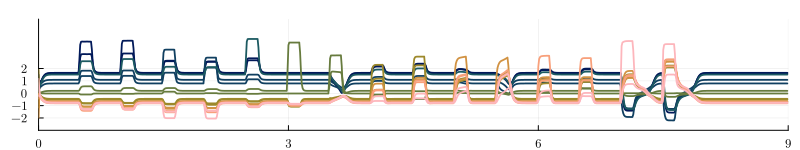

In [17]:
########################
#### plot real TS ######
########################
p1 = plot(title = " ",ytick = -2:1:2, xlim = (0,14), ylim = (-3,3.5))
for i in 1:size(Dintrinsic,1)
    plot!(time_vec[1:num_t], Dintrinsic[i,1:num_t], label = false, color = clrs[i], linewidth = 1.8) #label = intrinsic_neurons[i]
end


########################
#### plot simulation ######
########################
p2 = plot(title = " ",ytick = -2:1:2, xlim = (0,9), ylim = (-3,3.5))
for i in collect(1:Nintrinsic)
    plot!(sol_EJ_Syn.t[1:900],sol_EJ_Syn[i,:][1:900], label = false, color = clrs_nuance[i], linewidth = 1.8)
end


pall = plot(p1,p2, layout = (2,1), size = (700,330)) #size = (700,300)

p2 = plot!(p2, ylim = (-3,6), size = (800,150))

display(p2)

#savefig(p2,"figures/new_figs/optostim_ts.pdf") # behav ts plot

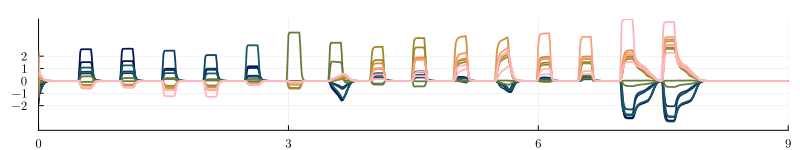

In [18]:

########################
## Compute baseline  ###
########################
avg_baseline = vec(mean(sol_EJ_Syn[:,30:40]', dims = 1))

########################
#### plot simulation ######
########################
p2 = plot(title = " ",ytick = -2:1:2, xlim = (0,9), ylim = (-3,3.5))
for i in collect(1:Nintrinsic)
    plot!(sol_EJ_Syn.t[1:900],sol_EJ_Syn[i,:][1:900].-avg_baseline[i], label = false, color = clrs_nuance[i], linewidth = 1.8)
end


pall = plot(p1,p2, layout = (2,1), size = (700,330)) #size = (700,300)

p2 = plot!(p2, ylim = (-4,5), size = (800,150))

display(p2)

#savefig(p2,"figures/new_figs/optostim_ts_displacement.pdf") # behav ts plot


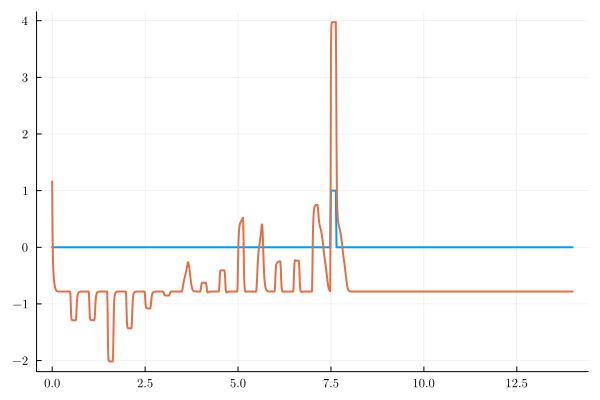

In [19]:
plot(time_vec[1:num_t], 0.001*ts_pulse_interp15(time_vec[1:num_t]))

plot!(time_vec[1:num_t],sol_EJ_Syn[15,:])

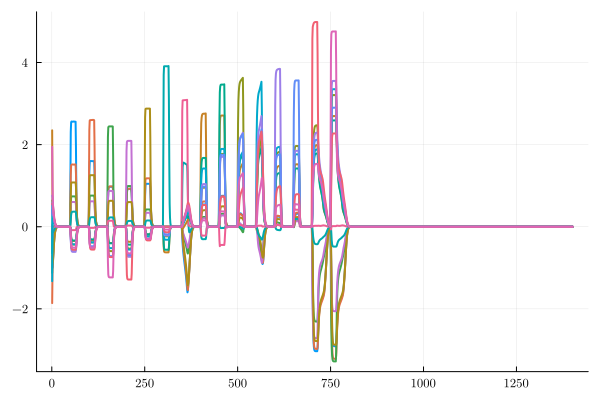

In [20]:
sol_sub_baseline = sol_EJ_Syn[:,:].-avg_baseline
plot(sol_sub_baseline')

In [21]:
#sol_mat = sol_EJ_Syn[:,:]
sol_mat = sol_sub_baseline

measure1 = sol_mat[:,tst1-2:tst1+20]
measure2 = sol_mat[:,tst2-5:tst2+20]
measure3 = sol_mat[:,tst3-5:tst3+20]
measure4 = sol_mat[:,tst4-5:tst4+20]
measure5 = sol_mat[:,tst5-5:tst5+20]
measure6 = sol_mat[:,tst6-5:tst6+20]
measure7 = sol_mat[:,tst7-5:tst7+20]
measure8 = sol_mat[:,tst8-5:tst8+20]
measure9 = sol_mat[:,tst9-5:tst9+20]
measure10 = sol_mat[:,tst10-5:tst10+20]
measure11 = sol_mat[:,tst11-5:tst11+20]
measure12 = sol_mat[:,tst12-5:tst12+20]
measure13 = sol_mat[:,tst13-5:tst13+20]
measure14 = sol_mat[:,tst14-5:tst14+20]
measure15 = sol_mat[:,tst15-5:tst15+20]

15×26 Matrix{Float64}:
 -0.0962893  -0.0613882   -0.038697     …  -2.29033    -2.15022    -2.05105
 -0.0988824  -0.0630317   -0.0397288       -2.38798    -2.23373    -2.12504
 -0.0466433  -0.0298879   -0.0189044       -1.60853    -1.42954    -1.31284
 -0.0362801  -0.0232436   -0.0147002       -1.34006    -1.20299    -1.10757
 -0.0957646  -0.0610282   -0.0384582       -2.36157    -2.19849    -2.07557
 -0.024797   -0.0165176   -0.0107838    …  -0.416029   -0.385736   -0.361783
  0.0018972   0.00120173   0.000753916      0.0266056   0.0251542   0.0239529
  0.035209    0.0237818    0.0151665        1.67755     1.45989     1.30344
  0.0385605   0.0255601    0.0169561        1.55705     1.36319     1.22522
  0.050506    0.0337116    0.0219778        1.89457     1.67965     1.52718
  0.0501531   0.0333291    0.0219457    …   1.80426     1.5889      1.43882
  0.061674    0.040947     0.026606         2.12777     1.8988      1.73738
  0.0555169   0.0368243    0.0239315        1.90426     1.7014

In [22]:
mns_m1 = mean(measure1, dims = 2)
mns_m2 = mean(measure2, dims = 2)
mns_m3 = mean(measure3, dims = 2)
mns_m4 = mean(measure4, dims = 2)
mns_m5 = mean(measure5, dims = 2)
mns_m6 = mean(measure6, dims = 2)
mns_m7 = mean(measure7, dims = 2)
mns_m8 = mean(measure8, dims = 2)
mns_m9 = mean(measure9, dims = 2)
mns_m10 = mean(measure10, dims = 2)
mns_m11 = mean(measure11, dims = 2)
mns_m12 = mean(measure12, dims = 2)
mns_m13 = mean(measure13, dims = 2)
mns_m14 = mean(measure14, dims = 2)
mns_m15 = mean(measure15, dims = 2)

15×1 Matrix{Float64}:
 -1.9398730213288349
 -2.124161666704516
 -2.1139978897337306
 -1.333161813985775
 -1.871859169469122
 -0.3218990637236932
  0.00858591678454656
  1.782133073846825
  1.7158691349888935
  2.140027945898266
  2.217609680159166
  2.3855616569264897
  1.9561461224075964
  1.5451397349400013
  3.0812584636150167

# Figure 7

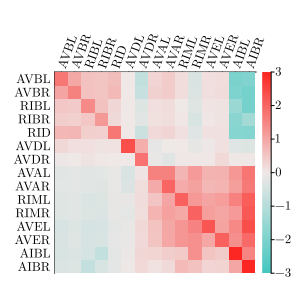

In [23]:


# measure1 = measure1 .- mean(measure1, dims=2)
# measure2 = measure2 .- mean(measure2, dims=2)
# measure3 = measure3 .- mean(measure3, dims=2)
# measure4 = measure4 .- mean(measure4, dims=2)
# measure5 = measure5 .- mean(measure5, dims=2)
# measure6 = measure6 .- mean(measure6, dims=2)
# measure7 = measure7 .- mean(measure7, dims=2)
# measure8 = measure8 .- mean(measure8, dims=2)
# measure9 = measure9 .- mean(measure9, dims=2)
# measure10 = measure10 .- mean(measure10, dims=2)
# measure11 = measure11 .- mean(measure11, dims=2)
# measure12 = measure12 .- mean(measure12, dims=2)
# measure13 = measure13 .- mean(measure13, dims=2)
# measure14 = measure14 .- mean(measure14, dims=2)
# measure15 = measure15 .- mean(measure15, dims=2)


funct_connect_sim = zeros(15,15)

# funct_connect_sim[:,1] = cor(measure1')[:,1]
# funct_connect_sim[:,2] = cor(measure2')[:,2]
# funct_connect_sim[:,3] = cor(measure3')[:,3]
# funct_connect_sim[:,4] = cor(measure4')[:,4]
# funct_connect_sim[:,5] = cor(measure5')[:,5]
# funct_connect_sim[:,6] = cor(measure6')[:,6]
# funct_connect_sim[:,7] = cor(measure7')[:,7]
# funct_connect_sim[:,8] = cor(measure8')[:,8]
# funct_connect_sim[:,9] = cor(measure9')[:,9]
# funct_connect_sim[:,10] = cor(measure10')[:,10]
# funct_connect_sim[:,11] = cor(measure11')[:,11]
# funct_connect_sim[:,12] = cor(measure12')[:,12]
# funct_connect_sim[:,13] = cor(measure13')[:,13]
# funct_connect_sim[:,14] = cor(measure14')[:,14]
# funct_connect_sim[:,15] = cor(measure15')[:,15]

funct_connect_sim[:,1] = mns_m1
funct_connect_sim[:,2] = mns_m2
funct_connect_sim[:,3] = mns_m3
funct_connect_sim[:,4] = mns_m4
funct_connect_sim[:,5] = mns_m5
funct_connect_sim[:,6] = mns_m6
funct_connect_sim[:,7] = mns_m7
funct_connect_sim[:,8] = mns_m8
funct_connect_sim[:,9] = mns_m9
funct_connect_sim[:,10] = mns_m10
funct_connect_sim[:,11] = mns_m11
funct_connect_sim[:,12] = mns_m12
funct_connect_sim[:,13] = mns_m13
funct_connect_sim[:,14] = mns_m14
funct_connect_sim[:,15] = mns_m15



#plot(heatmap(funct_connect_sim'))

p1 = plot(heatmap(intrinsic_neurons,intrinsic_neurons,funct_connect_sim, 
c = rgb_colors,  #rgb_colors
aspect_ratio=:equal,
            yflip = true,
            xrotation = 70,
            xmirror = true, clim = (-3,3)), size = (298,300))


display(p1)
#savefig(p1,"figures/new_figs/sim_weights.pdf") # behav ts plot

In [24]:
funct_connect_sim

15×15 Matrix{Float64}:
  1.75014     0.987424    0.596165   …  0.17005    -2.01695    -1.93987
  1.05705     1.57649     0.602211      0.184316   -1.97736    -2.12416
  0.512024    0.466266    1.44961       0.083253   -1.48646    -2.114
  0.416622    0.379672    0.523413      0.0734179  -1.7473     -1.33316
  0.758531    0.779981    0.391042      0.127133   -1.81463    -1.87186
  0.250944    0.142761    0.135649   …  0.113967   -0.274971   -0.321899
 -0.0554805  -0.0167768   0.0854887     0.239461    0.0148501   0.00858592
 -0.239956   -0.198567   -0.240379      0.85676     1.24893     1.78213
 -0.232991   -0.189947   -0.244522      0.811817    1.13157     1.71587
 -0.301256   -0.23613    -0.361306      1.14867     1.58888     2.14003
 -0.298393   -0.235753   -0.316828   …  1.02204     1.2047      2.21761
 -0.425131   -0.319499   -0.44559       1.07627     1.48544     2.38556
 -0.388044   -0.29465    -0.435082      2.09036     1.37437     1.95615
 -0.393257   -0.345038   -0.451221     

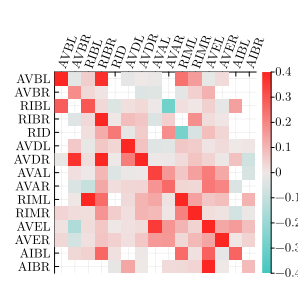

In [25]:
p1 = plot(heatmap(intrinsic_neurons,intrinsic_neurons,core_mat, 
c = rgb_colors,  #rgb_colors
aspect_ratio=:equal,
            yflip = true,
            xrotation = 70,
            xmirror = true, clim = (-0.4,0.4)), size = (298,300))

In [26]:
cor(measure15')[:,15]

funct_connect_sim = zeros(15,15)

15×15 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0

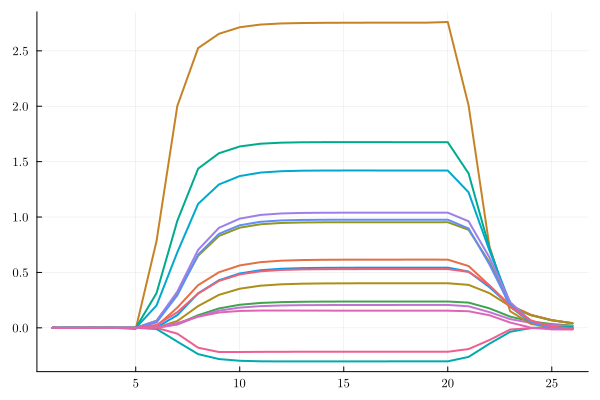

In [27]:
plot(measure8')